# Interactive Python Notebooks

© Explore Data Science Academy

## Learning Objectives
In this train, you will learn how to:

* Create advanced custom visualisations in Python; and
* Create interactive visualisations in a Jupyter notebook.

**Note:** you will need an active internet connection to complete the exercises within this notebook. 

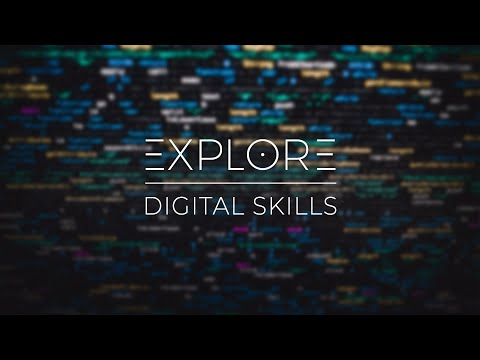

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('exA4bMFVpd4', width=940, height=500)

## Introduction

At times, you might need to have interactivity in your Jupyter notebook instead of a PowerBI dashboard. One reason may be to use a more powerful tool to address traditional business intelligence use cases. Traditional BI tools work great if you are building a dashboard on top of SQL or CSV. Still, if you want to visualise information that is generated by more sophisticated logic, they typically fall short.

With interactive widgets in a notebook, you can use the full power of Python to express calculations and generate visualisation, while exposing “your logic” to an end-user so they can control aspects of the visualisation. You can either add a few interactive controls and plots in notebooks or create fully-fledged applications and interactive dashboards. Both can be built with components from the built-in core widgets such as buttons, sliders and dropdowns, or with the rich ecosystem of custom widget libraries that are built upon the Jupyter widgets framework, such as interactive maps with `ipyleaflet` or 2-D plots with `bqplot`.

## Getting the notebook ready
Let's ensure you have the relevant packages installed, you import the necessary packages, and can read in the data correctly to get the notebook ready to create interactive visualisations.

### Step 1: Let's install the relevant packages

In [ ]:
!pip install ipywidgets --upgrade
!pip install chart-studio --upgrade
!pip install pyarrow --upgrade
!pip install cufflinks --upgrade

### Step 2: Enable interactive visualisations in Jupyter

In [ ]:
!jupyter nbextension enable --py widgetsnbextension

### Step 3: Now let's import the required packages

In [ ]:
# Standard Data Science helpers
import numpy as np
import pandas as pd
import scipy

# Instansiate the Plotly charting library.
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
# We use plotly.offline as this allows us to create interactive 
# visualisations without the use of an internet connection, 
# making our notebook more distributable to others. 
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

# The Cufflinks library allows us to directly bind 
# Pandas dataframes to Plotly charts. 
import cufflinks as cf
# Once again we use the Cufflinks library in offline mode. 
cf.go_offline(connected=True)
cf.set_config_file(colorscale='plotly', world_readable=True)

# Extra options. We use these to make our interactive 
# visualisations more aesthetically appealing. 
from IPython.core.display import HTML
pd.options.display.max_rows = 30
pd.options.display.max_columns = 25

# Show all code cells outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

### Step 4: Read in Data

For this project, we'll work with some stats data from www.medium.com. You can also use your own data if you wish!

In [ ]:
df = pd.read_parquet('https://github.com/WillKoehrsen/Data-Analysis/blob/master/medium/data/medium_data_2019_01_26?raw=true')
df.head()

Let's have a quick descriptive look at the data we've just pulled: 

In [ ]:
df.describe()

## Interactive visualisations
We'll now work through a few examples of interactive visualisations. We'll start with a simple filter to see how the interface works.

### Example 1

In [ ]:
from ipywidgets import interact, interact_manual, widgets

To make a function interactive, we need to use the ```@interact``` decorator. 

At this point you may be wondering; 'Wait, what's a decorator??'. Simply put, a decorator is a Python function which wraps around another declared function in order to enhance or augment its behaviour; like putting a ribbon around a present in order to make it look prettier as a gift. We won't go into the semantics of how to _create_ a decorator, but you can easily spot them above a function with the form ``@decorator_name``. 
For more information, see: https://realpython.com/primer-on-python-decorators/

Consider the code below.

In [ ]:
@interact
def show_articles_more_than(column='claps', x=5000):
    display(HTML(f'<h4>Showing articles with more than {x} {column}<h4>'))
    display(df.loc[df[column] > x, ['title', 'claps', 'published_date', 'read_time', 'tags', 'views', 'reads']])

The ```@interact``` decorator automatically inferred we want a text box for the column and an interactive slider. This decorator makes it incredibly simple to add interactivity. 

### Example 2

Now we will add a dropdown menu to select which column to filter on, while simultaneously adding limits for x. A dropdown menu can be useful when we need to enforce constraints on the interaction.

In [ ]:
@interact
def show_titles_more_than(x=(10, 50000, 10),
                          column=['read_time', 'views', 'reads']):
    display(HTML(f'<h4>Showing articles with more than {x} {column}<h4>'))
    display(df.loc[df[column] > x, ['title', 'published_date', 'read_time', 'tags', 'views', 'reads']])

### Try it yourself

Having seen the above two examples, see if you can create your own interactive filter.

Try to create a filter which can give all the datapoints with less than X `views`, `reads` or `claps`, with a range spanning from 1 to 100 in steps of 2. You can use the code below to get you started: 

In [ ]:
@interact
def show_titles_less_than(x=(), column=[]):
    
    # Insert your display code here
    pass

### Example 3

Moving on to more complex relationships with the data which we can make interactive, here we create a widget that quickly lets us find the correlation between two columns in the dataset.

In [ ]:
@interact
def correlations(column1=list(df.select_dtypes('number').columns), 
                 column2=list(df.select_dtypes('number').columns)):
    print(f"Correlation: {df[column1].corr(df[column2])}")

_Side note:_ within the above code example, we need to specify pandas colums which are of a numeric type with the code `df.select_dtypes('number')` as the correlation statistic is only defined between numeric values. 

### Example 4

We can use the same basic approach to create interactive widgets for plots. This approach allows us to expand the capabilities of the powerful `plotly` visualisation library.

In [ ]:
@interact
def scatter_plot(x=list(df.select_dtypes('number').columns), 
                 y=list(df.select_dtypes('number').columns)[1:]):
    if x == y:
        print(f"Please select seperate variables for X and Y")
    else:
        df.iplot(kind='scatter', x=x, y=y, mode='markers', 
                 xTitle=x.title(), yTitle=y.title(), title=f'{y.title()} vs {x.title()}')
        ## if you are using Google Colab, comment out the above line of code and uncomment the lines below
        #fig = px.scatter(df, x=x, y=y, title=f'{y.title()} vs {x.title()}')
        #fig.show(renderer="colab")

### Example 5

In a similar fashion to the previous example, we can create a customisable heatmap of correlations:

In [ ]:
cscales = ['Greys', 'YlGnBu', 'Greens', 'YlOrRd', 'Bluered', 'RdBu',
            'Reds', 'Blues', 'Picnic', 'Rainbow', 'Portland', 'Jet',
            'Hot', 'Blackbody', 'Earth', 'Electric', 'Viridis', 'Cividis']

# We use the Figure Factory module of Plotly, which
# defines many unique and powerful plots to be used
# in Python. 
# For more info, see: https://plot.ly/python/figure-factory-subplots/
import plotly.figure_factory as ff

corrs = df.corr()

@interact
def plot_corrs(colorscale=cscales):
    figure = ff.create_annotated_heatmap(z = corrs.round(2).values, 
                                     x =list(corrs.columns), 
                                     y=list(corrs.index), 
                                     colorscale=colorscale,
                                     annotation_text=corrs.round(2).values)
    iplot(figure)
    ## if you are using Google Colab, comment out the above line of code and uncomment the line below
    #figure.show(renderer="colab")

### Example 6

Interaction can also be extremely useful when we might want to try and view various configurations for a plot we are trying to produce. 

The following code allows us to add some options to control the colour scheme of a given Plotly chart. Here we call the `@interact_manual` decorator which allows us to select multiple variables before our chart is updated. 

In [ ]:
@interact_manual
def scatter_plot(x=list(df.select_dtypes('number').columns), 
                 y=list(df.select_dtypes('number').columns)[1:],
                 theme=list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    
    if x == y:
        print(f"Please select seperate variables for X and Y")
    else:
        df.iplot(kind='scatter', x=x, y=y, mode='markers', 
                 xTitle=x.title(), yTitle=y.title(), 
                 text='title',
                 title=f'{y.title()} vs {x.title()}',
                theme=theme, colorscale=colorscale)
        ## if you are using Google Colab, comment out the above line of code and uncomment the line below
        #fig = px.scatter(df, x=x, y=y, title=f'{y.title()} vs {x.title()}')
        #fig.show(renderer="colab")

### Example 7

As we've already learnt, sometimes its helpful to use color to represent additional dimensions of our data. Considering this, the following code lets us interactively choose the grouping category for the plot below:

In [ ]:
df['binned_read_time'] = pd.cut(df['read_time'], bins=range(0, 56, 5))
df['binned_read_time'] = df['binned_read_time'].astype(str)

df['binned_word_count'] = pd.cut(df['word_count'], bins=range(0, 100001, 1000))
df['binned_word_count'] = df['binned_word_count'].astype(str)

@interact
def scatter_plot(x=list(df.select_dtypes('number').columns), 
                 y=list(df.select_dtypes('number').columns)[1:],
                 categories=['binned_read_time', 'binned_word_count', 'publication', 'type'],
                 theme=list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    
    df.iplot(kind='scatter', x=x, y=y, mode='markers', 
             categories=categories, 
             xTitle=x.title(), yTitle=y.title(), 
             text='title',
             title=f'{y.title()} vs {x.title()}',
             theme=theme, colorscale=colorscale)
    ## if you are using Google Colab, comment out the above line of code and uncomment the line below
    #fig = px.scatter(df, x=x, y=y, title=f'{y.title()} vs {x.title()}')
    #fig.show(renderer="colab")

### Example 8

The decorator ```@interact``` is not the only way to use widgets. Read through the following example to figure out how else to use widgets.

In [ ]:
df.set_index('published_date', inplace=True)

In [ ]:
def print_articles_published(start_date, end_date):
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    stat_df = df.loc[(df.index >= start_date) & (df.index <= end_date)].copy()
    total_words = stat_df['word_count'].sum()
    total_read_time = stat_df['read_time'].sum()
    num_articles = len(stat_df)
    print(f'According to our dataset, published by Medium.com, there are {num_articles} articles between {start_date.date()} and {end_date.date()}.')
    print(f'These articles totalled {total_words:,} words and {total_read_time/60:.2f} hours to read.')
    
_ = interact(print_articles_published,
             start_date=widgets.DatePicker(value=pd.to_datetime('2018-01-01')),
             end_date=widgets.DatePicker(value=pd.to_datetime('2019-01-01')))

### Test Yourself

To test your understanding, see if you can implement an interactive function which plots the sum of all articles written between a `start_date` and a `stop_date`, as a percentage of the total number of articles within the database:

**Hint:** A good chart to represent this quantity may be a pie chart. 

In [ ]:
def plot_articles_published_between_dates(start_date, end_date):
    
    # Define your code here
    
    pass

### Example 9

For our final example, we use `Dropdown` and `DatePicker` widgets to plot one column cumulatively up to a certain time. 

In [ ]:
def plot_up_to(column, date):
    date = pd.Timestamp(date)
    plot_df = df.loc[df.index <= date].copy()
    plot_df[column].cumsum().iplot(mode='markers+lines', 
                                   xTitle='published date',
                                   yTitle=column, 
                                  title=f'Cumulative {column.title()} Until {date.date()}')
    
_ = interact(plot_up_to, column=widgets.Dropdown(options=list(df.select_dtypes('number').columns)), 
             date = widgets.DatePicker(value=pd.to_datetime('2019-01-01')))

## Conclusion

Jupyter Notebook is a great data exploration and analysis environment. Using tools like notebook extensions and interactive widgets makes our job as data-driven storytellers even more efficient. Widgets are powerful tools which allow us to make our data more interactive, and therefore more accessible to non-data scientists.

## Appendix
[Interactive controls for Jupyter Notebooks](https://towardsdatascience.com/interactive-controls-for-jupyter-notebooks-f5c94829aee6)

[Interactive dashboards in Jupyter](https://blog.dominodatalab.com/interactive-dashboards-in-jupyter/)

[Getting Started with Jupyter Dashboards](https://jupyter-dashboards-layout.readthedocs.io/en/latest/getting-started.html#)